In [ ]:
!nvidia-smi

Tue Nov 28 20:55:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)


In [ ]:
!pip install ipython
from IPython.display import display,Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import cv2
import ultralytics
from ultralytics import YOLO

In [ ]:
# Training
!yolo task=segment mode=train model=yolov8l-seg.pt data=../content/drive/MyDrive/Ydataset/dataset.yaml epochs=10 imgsz=640 plots=True

# Hyperparameter Tuning
model = YOLO('yolov8l-seg.pt')
model.tune(data='/content/drive/MyDrive/Ydataset/dataset.yaml', epochs=10, iterations=3, optimizer='AdamW', lr0=0.01, mosaic=0.5, amp=True, plots=True, save=False, val=False, imgsz=640)


Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=../content/drive/MyDrive/Ydataset/dataset.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

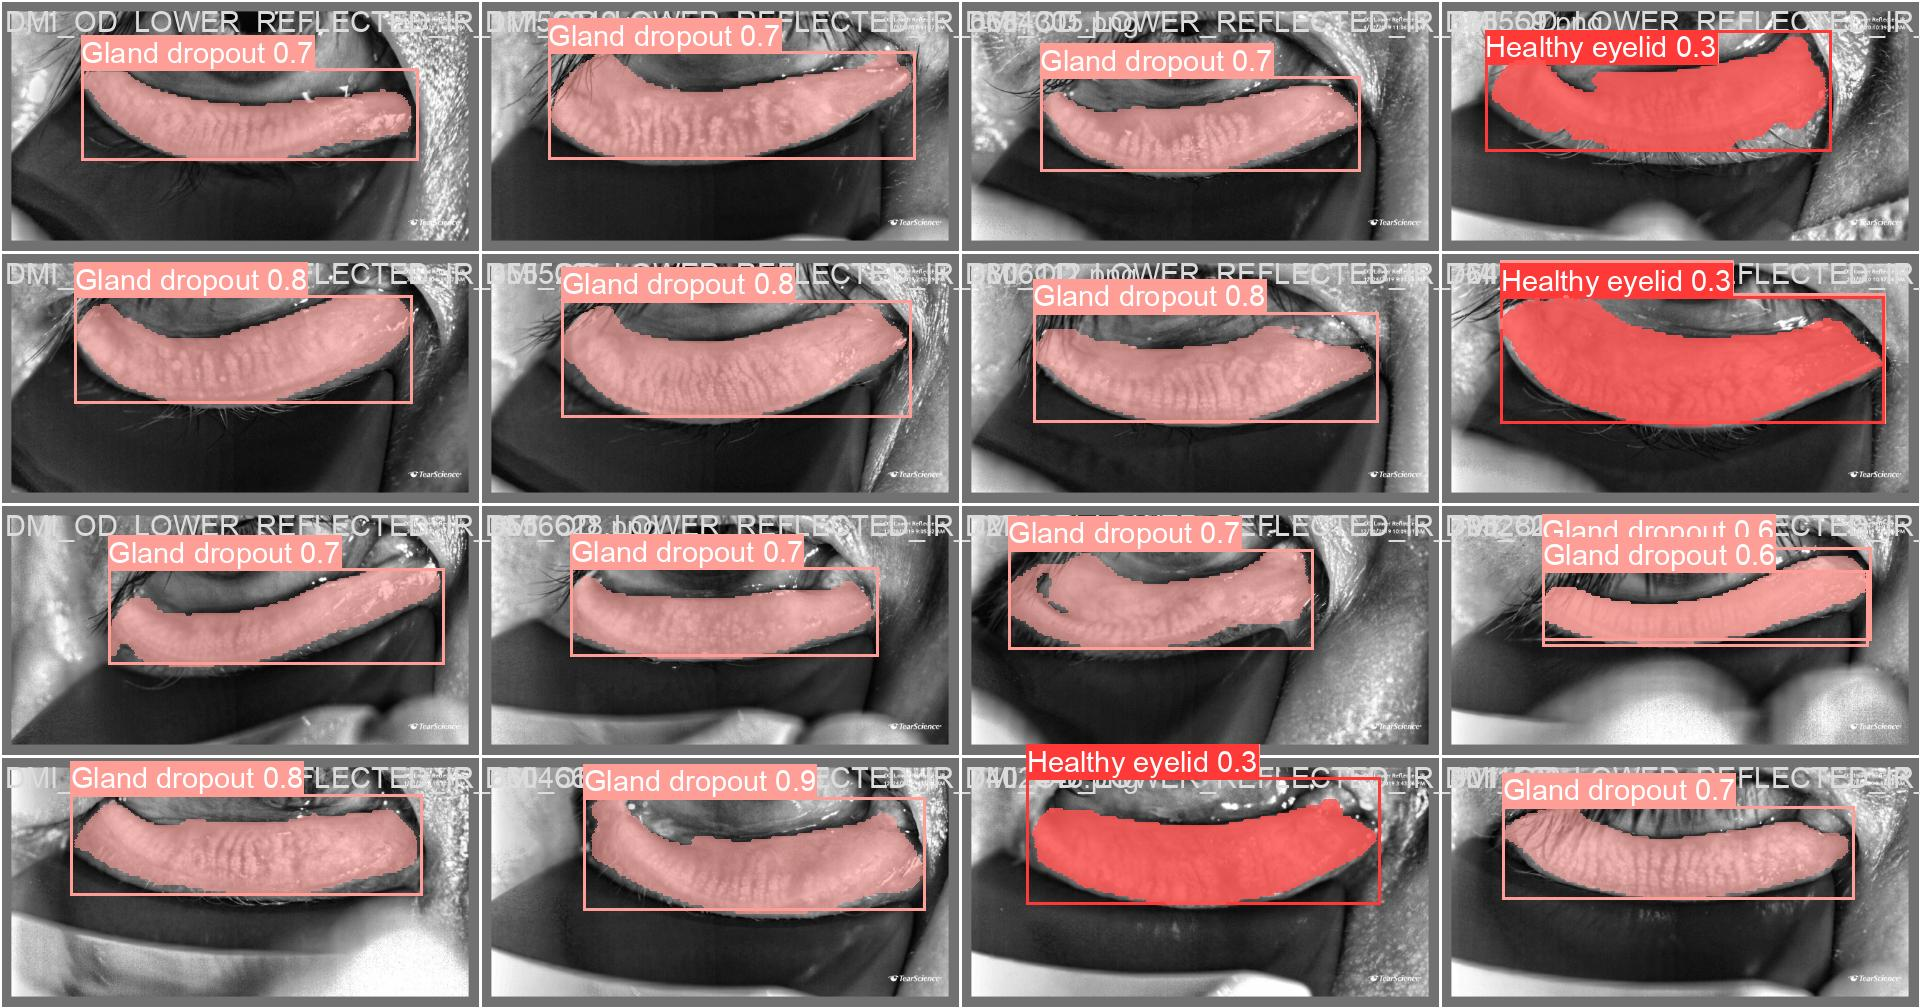

In [ ]:
#trained images
image= "/content/runs/segment/train4/val_batch0_pred.jpg"
Image(filename=image, width=1000)

In [ ]:
#Validate the model
!yolo task=segment mode=val model='../content/runs/segment/train4/weights/best.pt' data='../content/drive/MyDrive/Ydataset/dataset.yaml'

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/drive/MyDrive/Ydataset/val/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.05s/it]
                   all         40         40      0.459          1      0.577      0.453      0.459          1      0.577      0.415
        Healthy eyelid         40         23      0.545          1      0.724      0.546      0.545          1      0.724      0.509
         Gland dropout         40         17      0.373          1       0.43       0.36      0.373          1       0.43      0.322
Speed: 1.8ms preprocess, 24.8ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/segment/val2
💡 Learn 

In [ ]:
#Inference
!yolo task=segment mode=predict model='../content/runs/segment/train4/weights/best.pt' conf=0.50 source='../content/drive/MyDrive/Ydataset/test/images' save=True plots=True



Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs

image 1/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10209332.png: 320x640 1 Gland dropout, 78.7ms
image 2/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10248573.png: 320x640 1 Gland dropout, 40.4ms
image 3/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10354324.png: 320x640 1 Gland dropout, 40.4ms
image 4/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10408283.png: 320x640 1 Gland dropout, 40.4ms
image 5/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10441395.png: 320x640 1 Gland dropout, 39.6ms
image 6/40 /content/../content/drive/MyDrive/Ydataset/test/images/DMI_OD_LOWER_REFLECTED_IR_10463104.png: 320x640 1 Gland dropout, 39

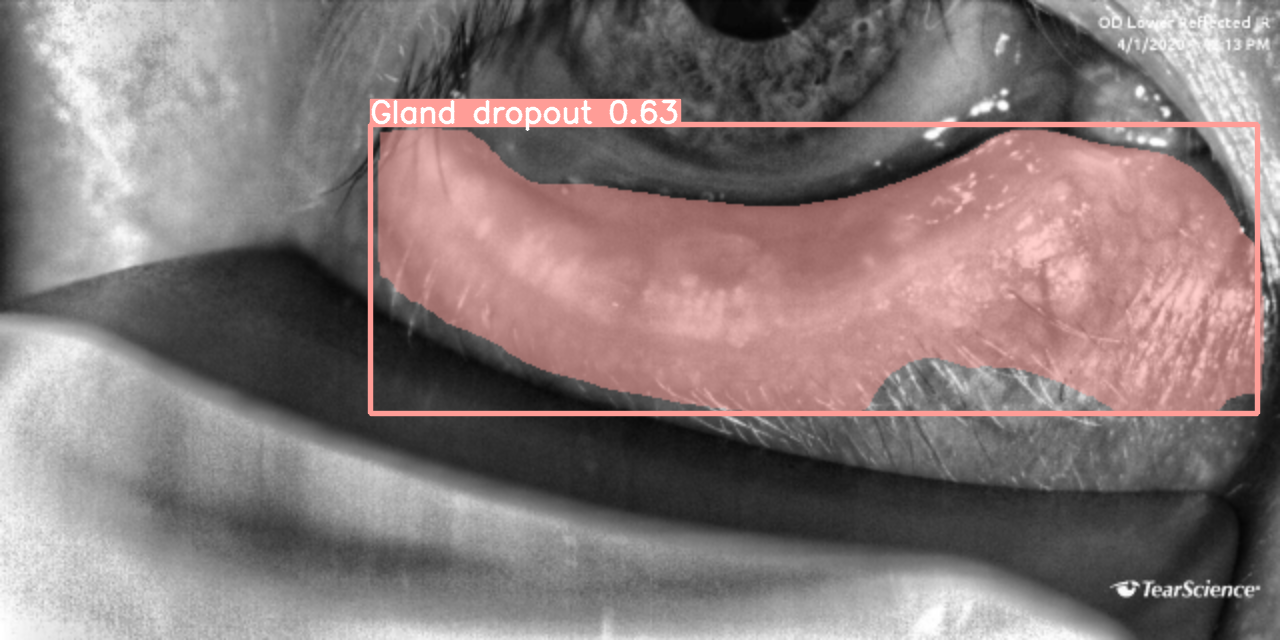

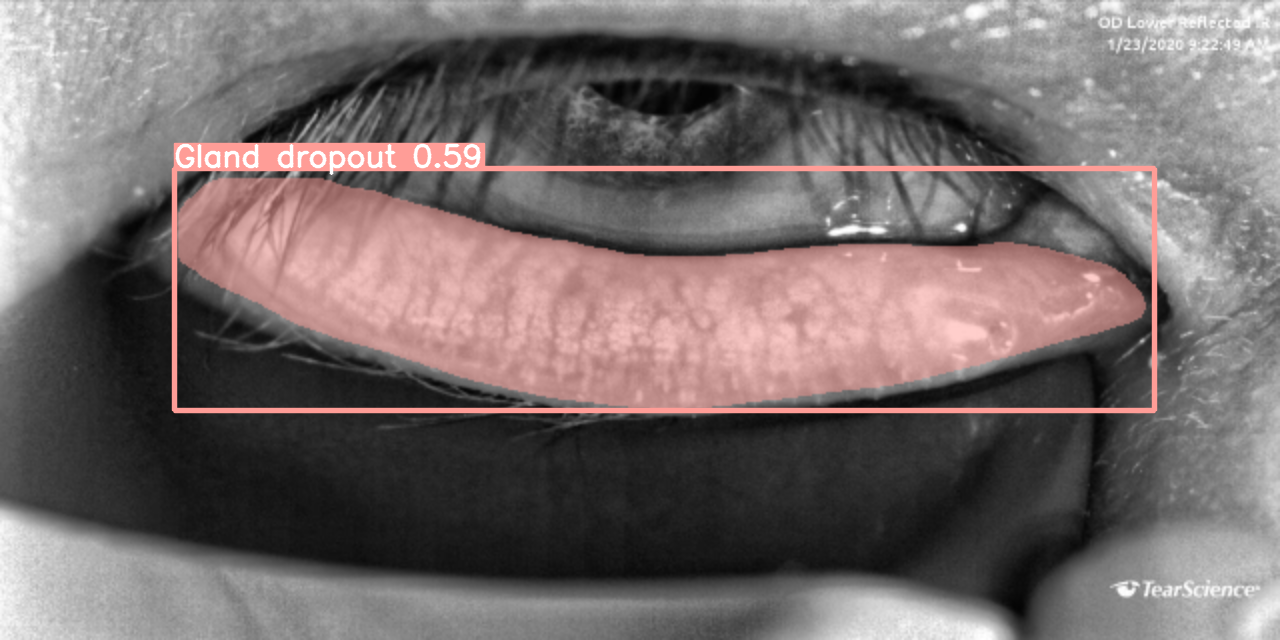

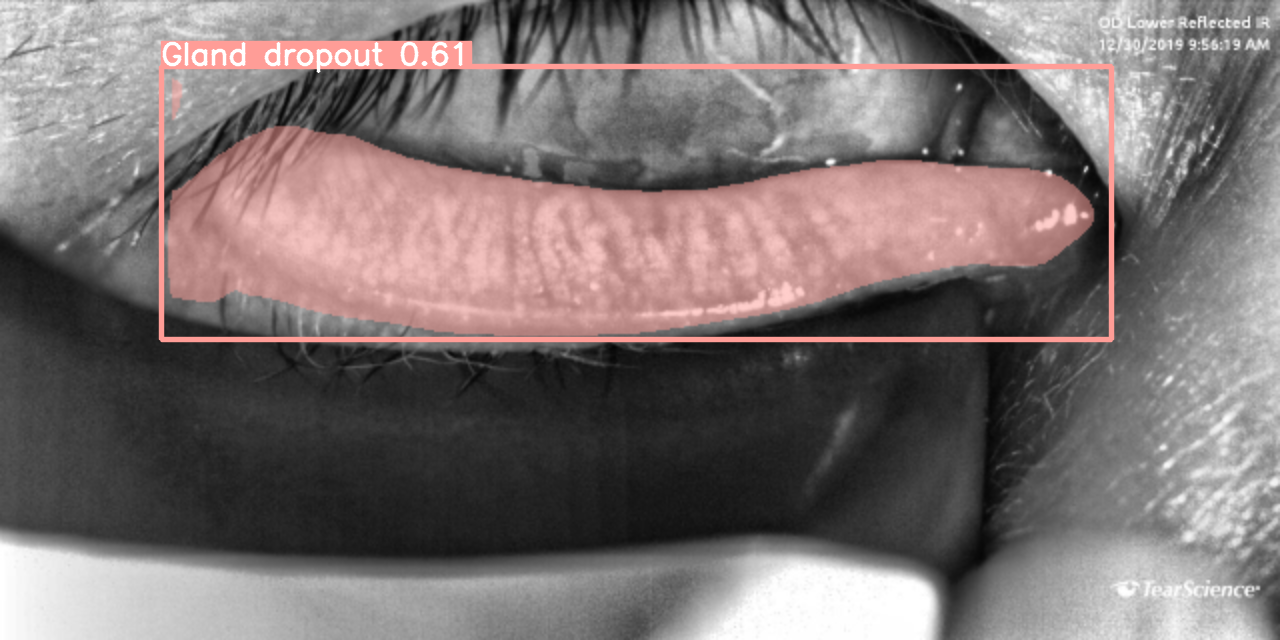

In [ ]:
#Visualization
import glob
from IPython.display import Image, display
for pred_res in glob.glob('/content/runs/segment/predict2/*.png')[:3]:
      display(Image(filename=pred_res, width=400))
      print("\n")

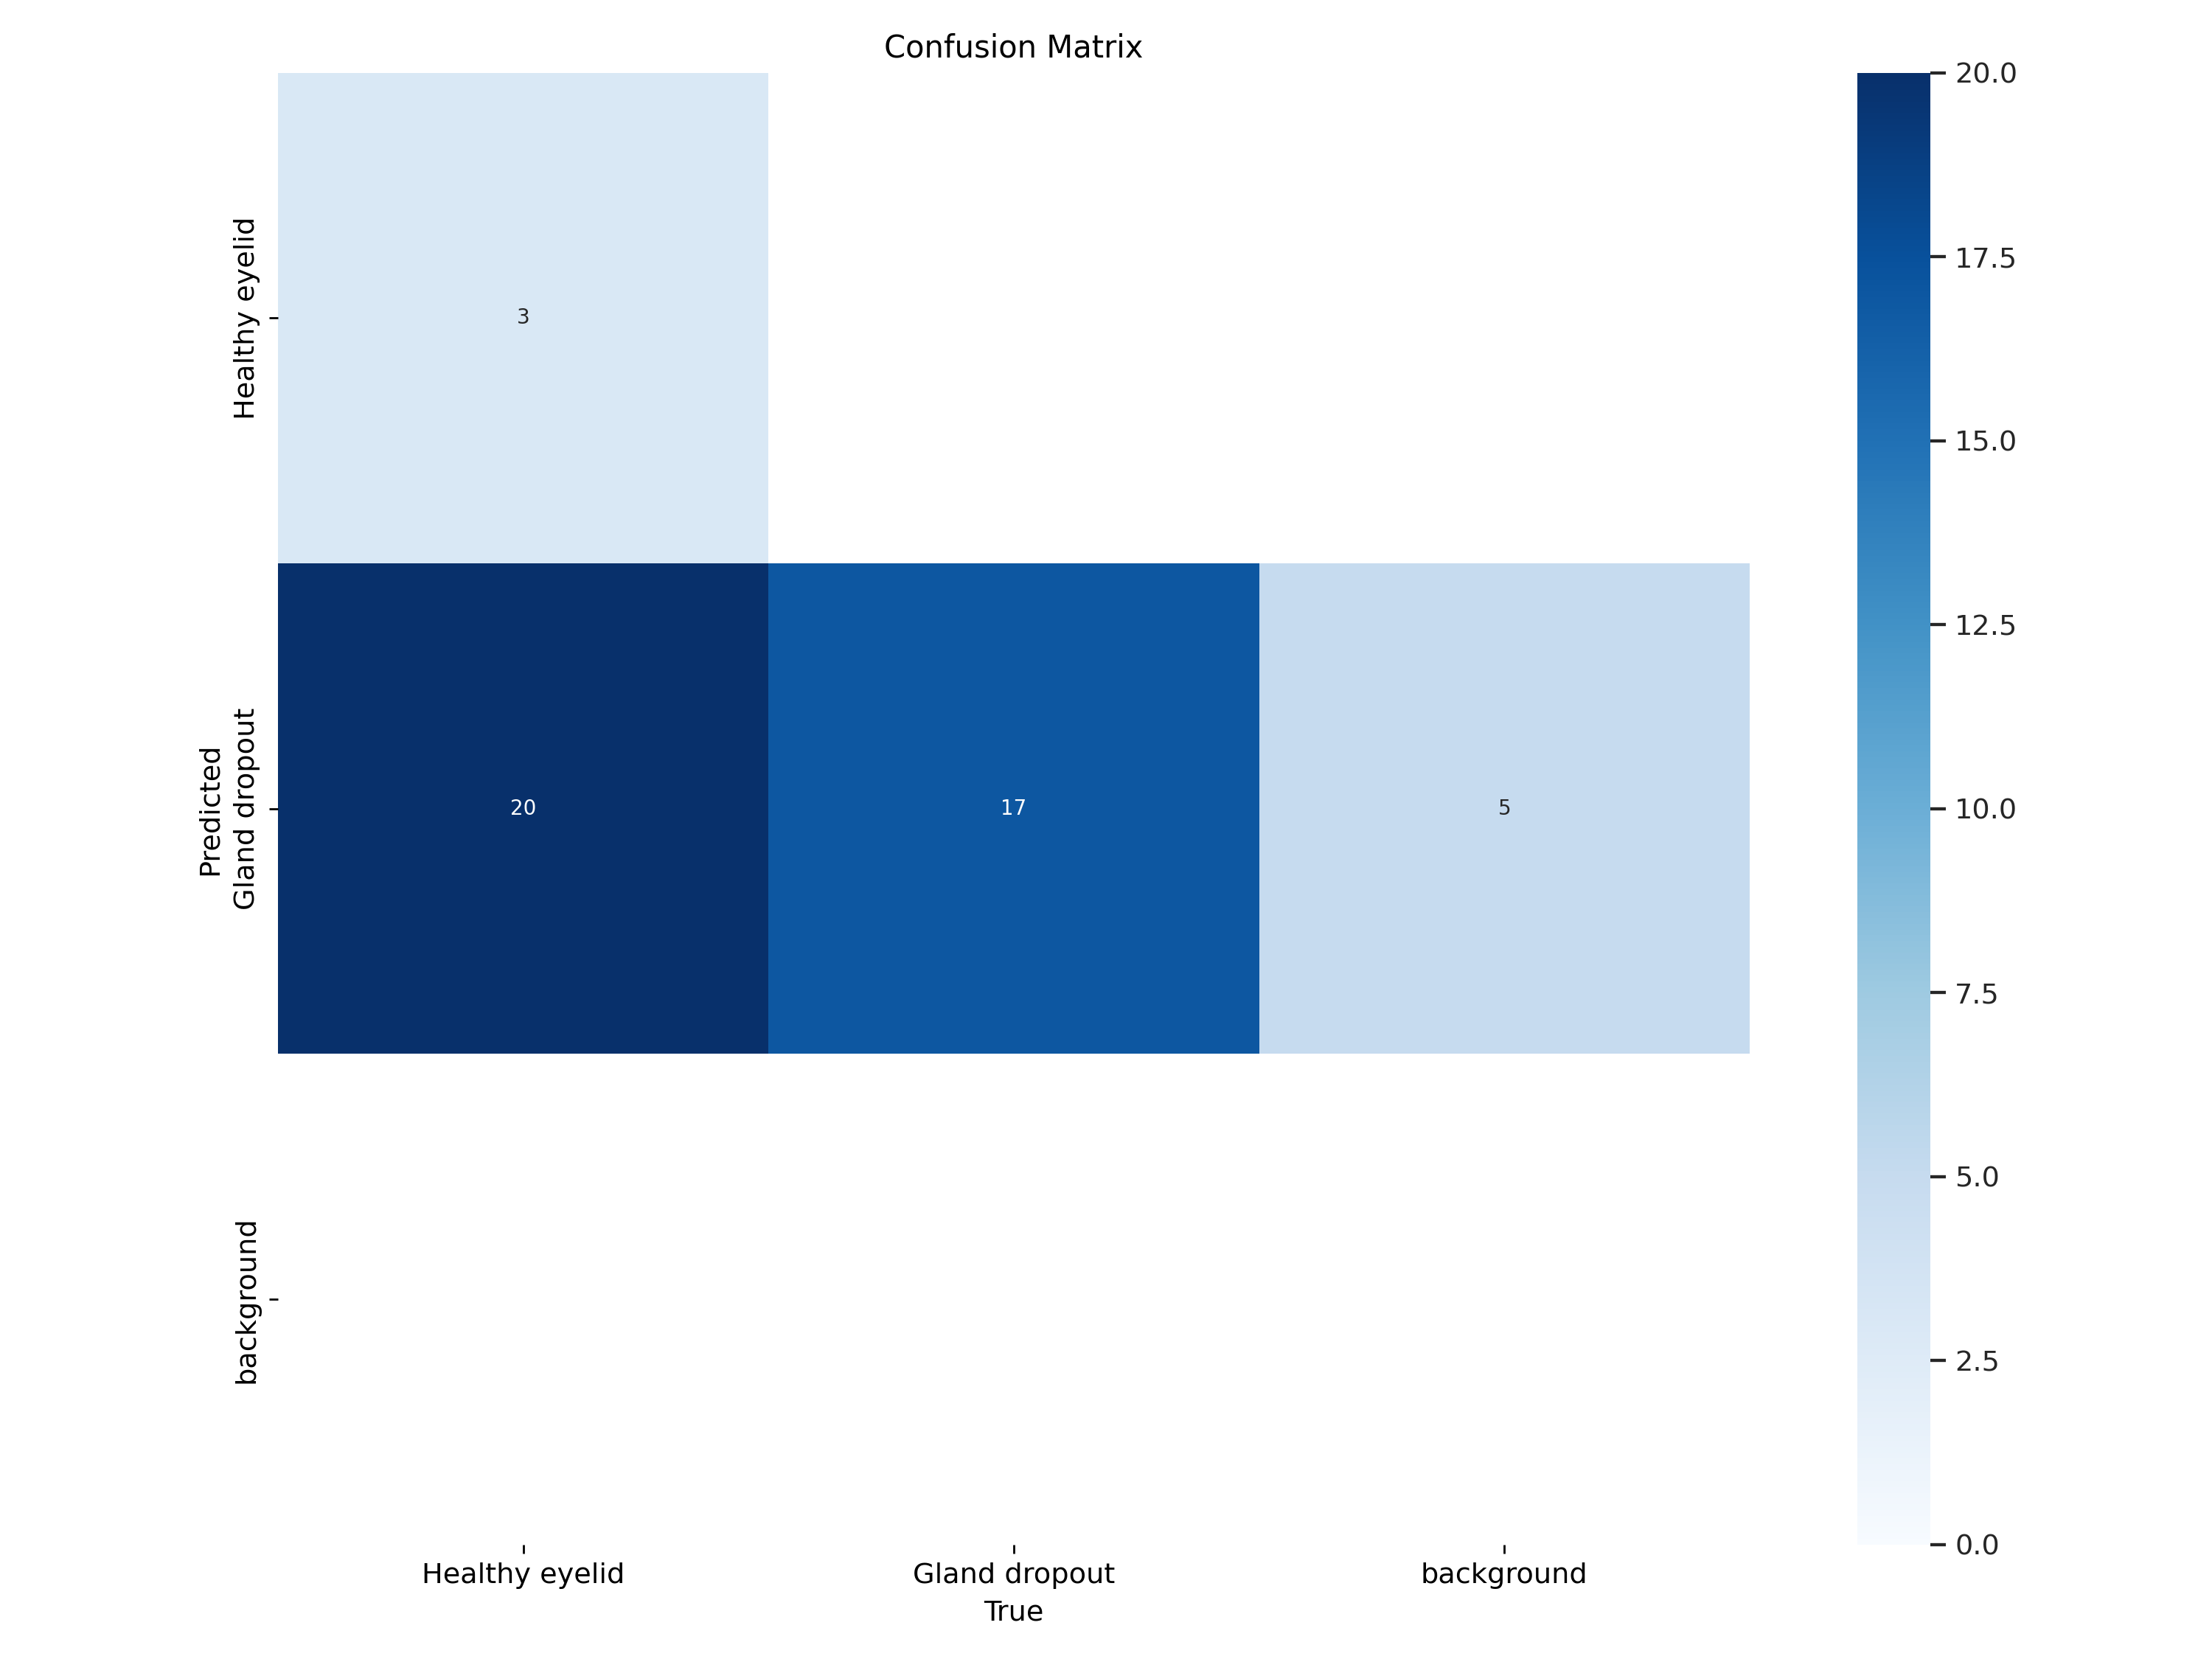

In [ ]:
confu_matrix = "/content/runs/segment/train4/confusion_matrix.png"
Image(filename=confu_matrix, width=800)

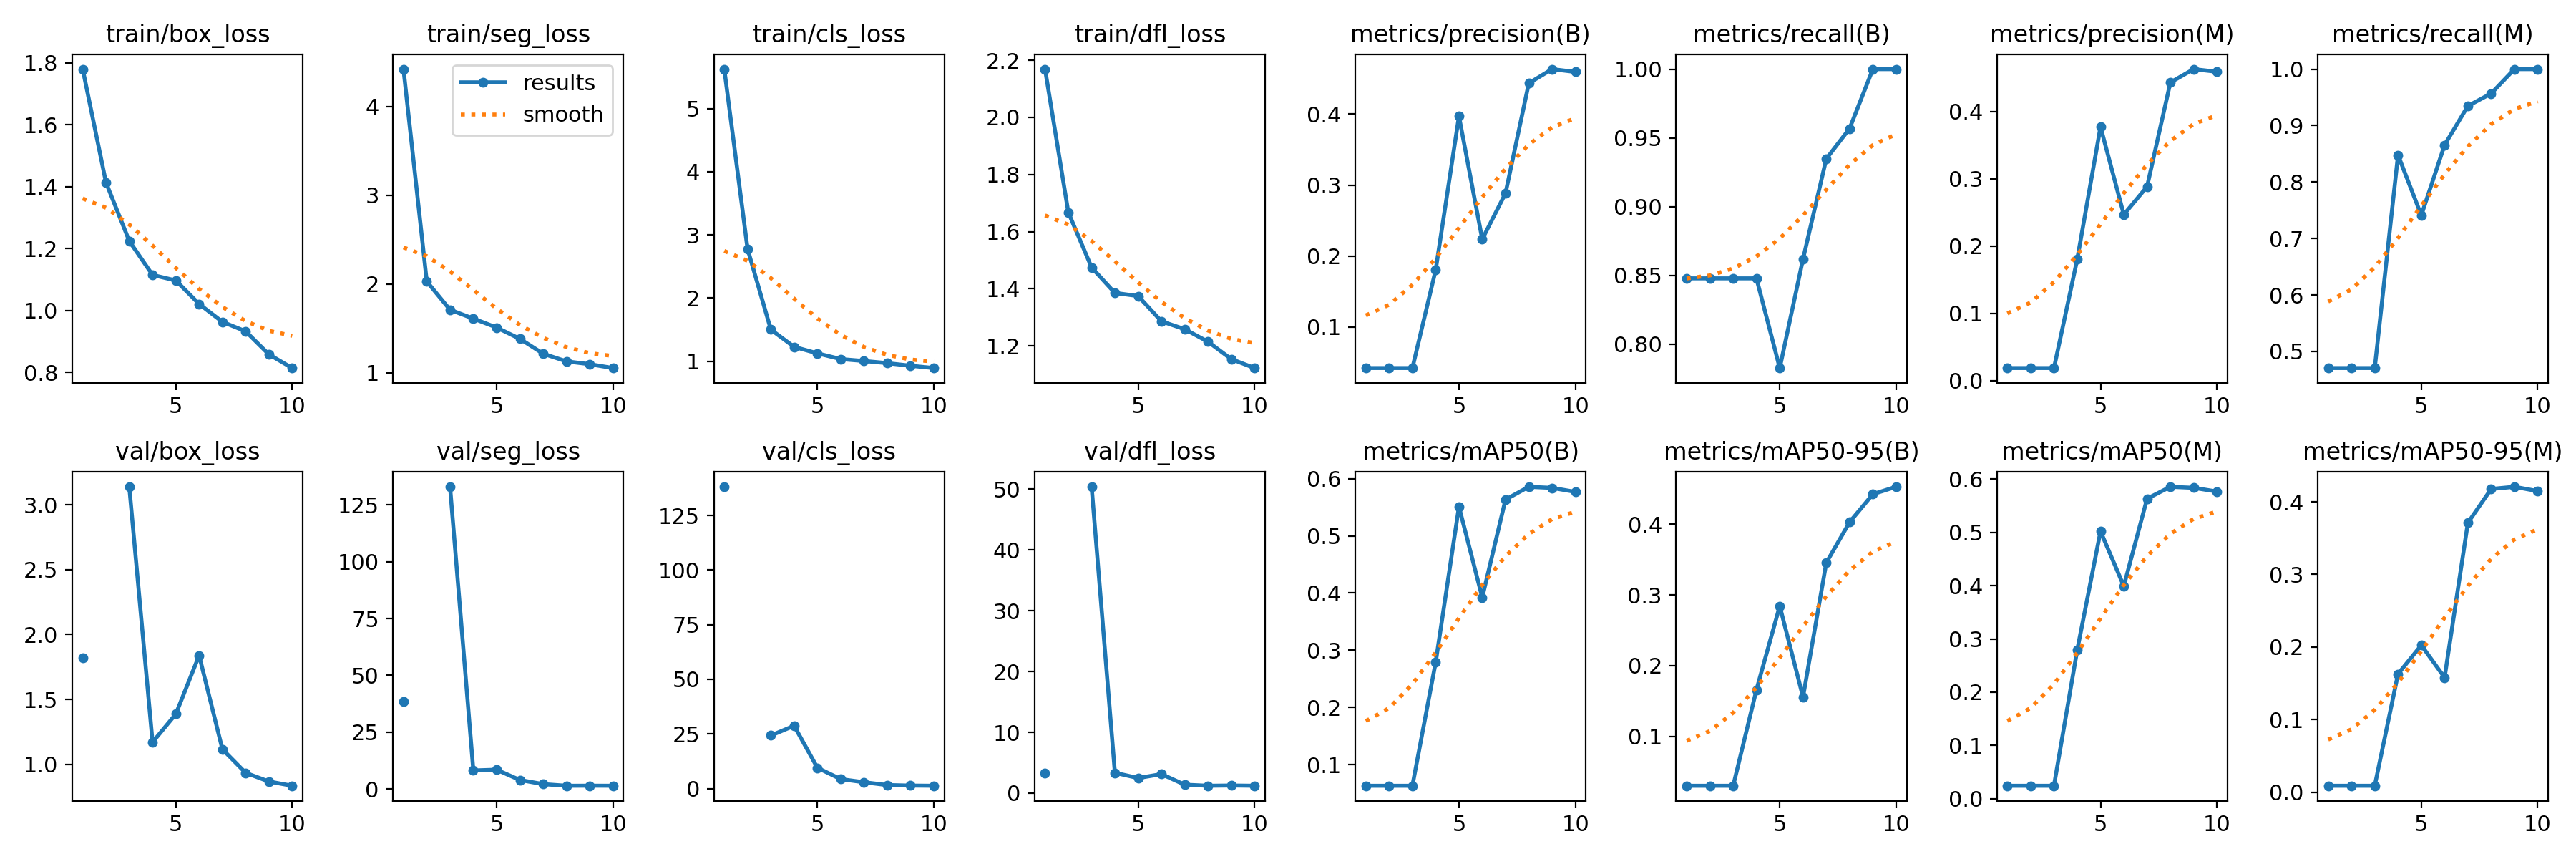

In [ ]:
result = "/content/runs/segment/train4/results.png"
Image(filename=result, width=900)